In [13]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import joblib
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [14]:
# Fungsi untuk mengekstrak fitur HOG dari gambar
def extract_hog_features(image_path, resize_dim=(244, 244)):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, resize_dim)
    hog_features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, multichannel=True)
    return hog_features

In [15]:
# Fungsi untuk memuat dan mengekstrak fitur HOG dari dataset
def load_and_extract_features(data_dir, classes, resize_dim=(244, 244)):
    X = []
    y = []
    
    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            features = extract_hog_features(img_path, resize_dim)
            X.append(features)
            y.append(class_name)
    
    return np.array(X), np.array(y)

In [4]:
# Path ke direktori dataset
dataset_dir = "./Dataset/1. Resize"
classes = ['Mentah', 'Menuju Matang', 'Matang', 'Terlalu matang', 'Busuk']

# Memuat dan mengekstrak fitur HOG dari dataset
X, y = load_and_extract_features(dataset_dir, classes)

# Menyusun fitur dan label ke dalam DataFrame pandas
df = pd.DataFrame(X)
df['label'] = y

# Simpan DataFrame ke dalam file CSV
csv_file = "./Dataset/Dataset_Pisang_Kepok.csv"
df.to_csv(csv_file, index=False)
print(f'Dataset telah disimpan ke dalam file: {csv_file}')

In [16]:
# Memuat dan memproses data dari file CSV
def load_and_prepare_data(csv_path):
    df = pd.read_csv(csv_path)
    X = df.iloc[:, :-1].values
    y = df['label'].values
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    return train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Path ke file CSV
csv_file = "./Dataset/Dataset_Pisang_Kepok.csv"

# Memuat dan memproses data dari file CSV
X_train, X_test, y_train, y_test = load_and_prepare_data(csv_file)

In [17]:
# Fungsi untuk melatih model SVM
def train_svm(X_train, y_train):
    svm = SVC(kernel='linear', random_state=42)
    svm.fit(X_train, y_train)
    return svm

# Melatih model SVM
svm = train_svm(X_train, y_train)

In [18]:
# Fungsi untuk menyimpan model SVM
def save_model(model, model_path):
    joblib.dump(model, model_path)
    print(f'Model SVM telah disimpan ke: {model_path}')

# Path ke file model yang akan disimpan
model_path = "./Models/SVM_best_model.pkl"

# Menyimpan model SVM
save_model(svm, model_path)

Model SVM telah disimpan ke: ./Models/SVM_best_model.pkl


In [19]:
# Fungsi untuk memuat model SVM yang telah disimpan
def load_model(model_path):
    return joblib.load(model_path)

# Memuat model SVM yang telah disimpan
svm_loaded = load_model(model_path)

                precision    recall  f1-score   support

        Mentah       1.00      1.00      1.00        37
 Menuju Matang       0.93      0.93      0.93        28
        Matang       1.00      1.00      1.00        32
Terlalu Matang       0.93      0.93      0.93        29
         Busuk       1.00      1.00      1.00        34

      accuracy                           0.97       160
     macro avg       0.97      0.97      0.97       160
  weighted avg       0.97      0.97      0.97       160



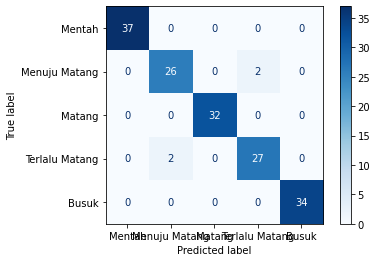

In [20]:
# Fungsi untuk mengevaluasi model SVM
def evaluate_model(model, X_test, y_test, classes):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=classes))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Evaluasi model SVM
evaluate_model(svm_loaded, X_test, y_test, classes)